In [106]:
import numpy as np
import xarray as xr
import math
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

In [6]:
ds_alpha_0 = xr.open_dataset('/data/jpetrie/MEOPAR/SalishSea/results/mesozoo_alpha_changes/nampismezo_zz_rate_mesozoo_alpha_0/SS5x5_1h_20150201_20150205_ptrc_T.nc')
ds_alpha_half = xr.open_dataset('/data/jpetrie/MEOPAR/SalishSea/results/mesozoo_alpha_changes/nampismezo_zz_rate_mesozoo_alpha_0.5/SS5x5_1h_20150201_20150205_ptrc_T.nc')
ds_alpha_1 = xr.open_dataset('/data/jpetrie/MEOPAR/SalishSea/results/mesozoo_alpha_changes/nampismezo_zz_rate_mesozoo_alpha_1/SS5x5_1h_20150201_20150205_ptrc_T.nc')

In [31]:
print(ds_alpha_0)

<xarray.Dataset>
Dimensions:               (axis_nbounds: 2, deptht: 40, time_counter: 120, x: 5, y: 5)
Coordinates:
  * deptht                (deptht) float32 1.28205 3.84615 6.41026 8.97436 ...
    nav_lat               (y, x) float32 -0.5 -0.5 -0.5 -0.5 -0.5 0.0 0.0 ...
    nav_lon               (y, x) float32 0.0 0.5 1.0 1.5 2.0 0.0 0.5 1.0 1.5 ...
    time_centered         (time_counter) datetime64[ns] 2015-02-01T00:30:00 ...
  * time_counter          (time_counter) datetime64[ns] 2015-02-01T00:30:00 ...
  * axis_nbounds          (axis_nbounds) int64 0 1
  * x                     (x) int64 0 1 2 3 4
  * y                     (y) int64 0 1 2 3 4
Data variables:
    DOC                   (time_counter, deptht, y, x) float64 0.0 0.0 0.0 ...
    MICZ                  (time_counter, deptht, y, x) float64 0.0 0.0 0.0 ...
    MYRI                  (time_counter, deptht, y, x) float64 0.0 0.0 0.0 ...
    NH4                   (time_counter, deptht, y, x) float64 0.0 0.0 0.0 ...
    NO3   

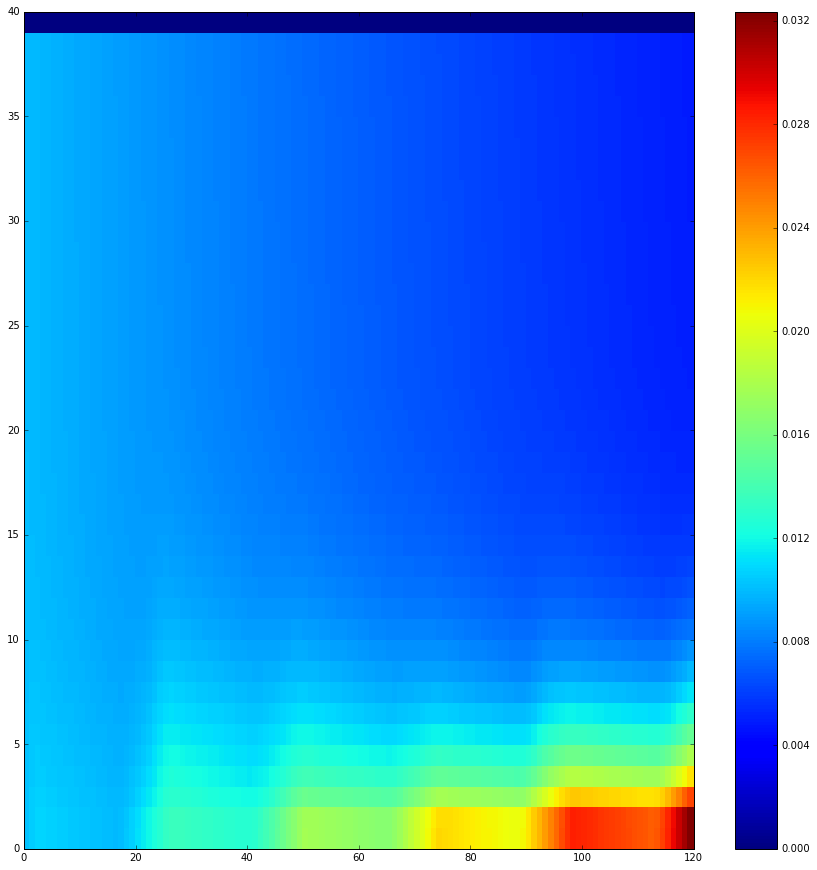

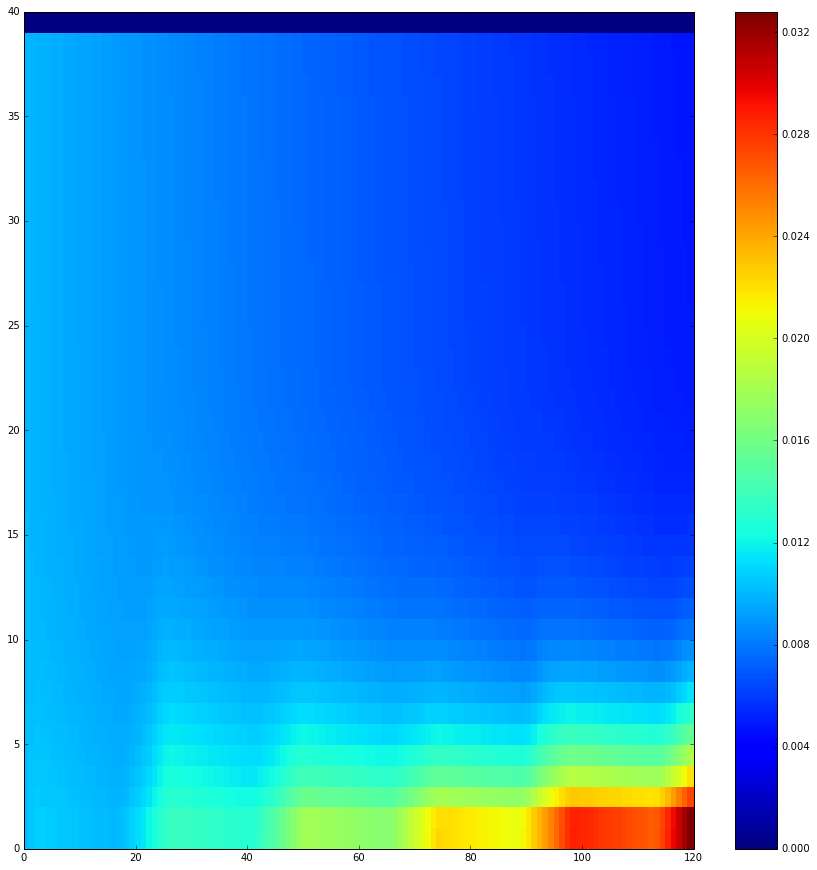

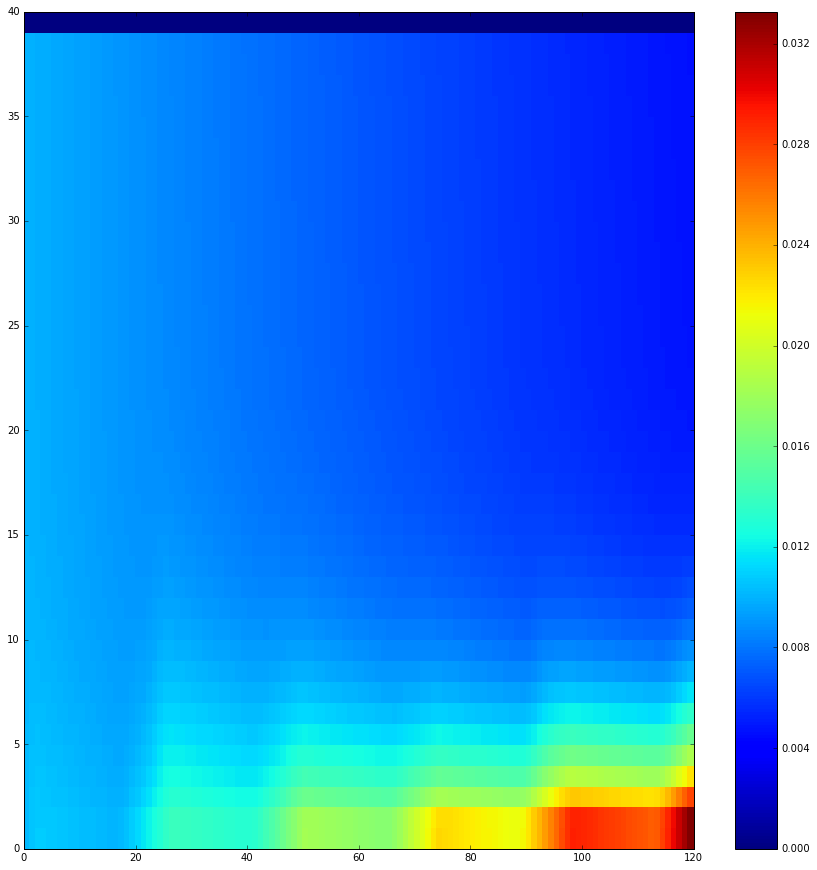

In [34]:
data_subset = ds_alpha_0.PHY.values[:,:,2,2].T
fig, ax = plt.subplots(1, 1,figsize=(15,15))
mesh = ax.pcolormesh(data_subset)
fig.colorbar(mesh)
mesh.set_clim(vmin=data_subset.min(), vmax=data_subset.max())

data_subset = ds_alpha_half.PHY.values[:,:,2,2].T
fig, ax = plt.subplots(1, 1,figsize=(15,15))
mesh = ax.pcolormesh(data_subset)
fig.colorbar(mesh)
mesh.set_clim(vmin=data_subset.min(), vmax=data_subset.max())

data_subset = ds_alpha_1.PHY.values[:,:,2,2].T
fig, ax = plt.subplots(1, 1,figsize=(15,15))
mesh = ax.pcolormesh(data_subset)
fig.colorbar(mesh)
mesh.set_clim(vmin=data_subset.min(), vmax=data_subset.max())

In [162]:
df0 =  ds_alpha_0.to_dataframe()
df0['ALPHA'] =  0
dfhalf =  ds_alpha_half.to_dataframe()
dfhalf['ALPHA'] =  0.5
df1 =  ds_alpha_1.to_dataframe()
df1['ALPHA'] =  1

df = pd.concat([df0, dfhalf,df1])

df_subset = df.query('x in [1,2,3] and y ==2 and axis_nbounds == 0')
df_subset.reset_index(inplace=True) 

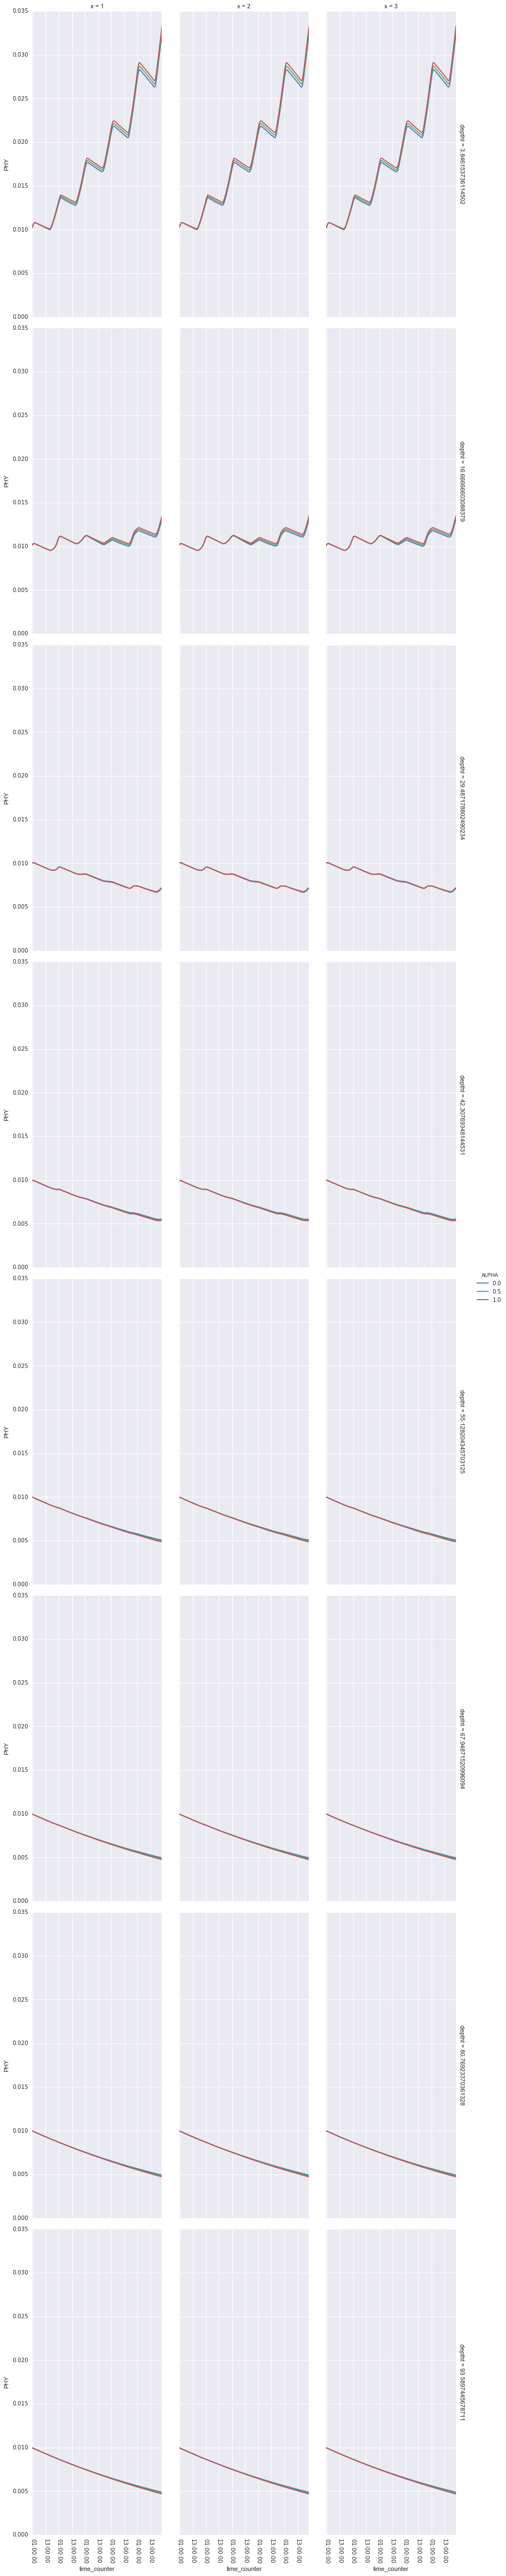

In [164]:
depth_subset = ds_alpha_0.deptht.values[1:len(ds_alpha_0.deptht.values):5]
g = sns.FacetGrid(df_subset.query('deptht in @depth_subset'), row="deptht", col="x", margin_titles=True, hue = "ALPHA", size = 8, aspect = 0.5)
g.map(plt.plot, "time_counter", "PHY")
g.add_legend()
g.set_xticklabels(rotation=-90)